In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Standard plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [36]:
#CGM imports
df1 = pd.read_csv('C:/Users/towns/Desktop/DiabetesData/cgm-17062020_051740 (1).csv')
df1 = df1.drop('DeviceType',axis=1)
df1 = df1.drop('SerialNumber',axis=1)
df1 = df1.drop('Description',axis=1)
df1['Date'] = pd.to_datetime(df1['EventDateTime']).dt.date
df1['Time'] = pd.to_datetime(df1['EventDateTime']).dt.time
df1['Hour'] = df['Time'][3:5]
df1 = df1.drop('EventDateTime',axis=1)
df1['Year'] = pd.DatetimeIndex(df1['Date']).year
df1['Month'] = pd.DatetimeIndex(df1['Date']).month
df1['Day'] = pd.DatetimeIndex(df1['Date']).day
#df1 = df1.drop('Date',axis=1)

df2 = pd.read_csv('C:/Users/towns/Desktop/DiabetesData/cgm-17062020_060035.csv')
df2 = df2.drop('DeviceType',axis=1)
df2 = df2.drop('SerialNumber',axis=1)
df2 = df2.drop('Description',axis=1)
df2['Date'] = pd.to_datetime(df2['EventDateTime']).dt.date
df2['Time'] = pd.to_datetime(df2['EventDateTime']).dt.time
df2['Hour'] = df['Time'][3:5]
df2 = df2.drop('EventDateTime',axis=1)
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Day'] = pd.DatetimeIndex(df2['Date']).day
#df2 = df2.drop('Date',axis=1)

df3 = pd.read_csv('C:/Users/towns/Desktop/DiabetesData/cgm-17062020_054932.csv')
df3 = df3.drop('DeviceType',axis=1)
df3 = df3.drop('SerialNumber',axis=1)
df3 = df3.drop('Description',axis=1)
df3['Date'] = pd.to_datetime(df3['EventDateTime']).dt.date
df3['Time'] = pd.to_datetime(df3['EventDateTime']).dt.time
df3['Hour'] = df['Time'][3:5]
df3 = df3.drop('EventDateTime',axis=1)
df3['Year'] = pd.DatetimeIndex(df3['Date']).year
df3['Month'] = pd.DatetimeIndex(df3['Date']).month
df3['Day'] = pd.DatetimeIndex(df3['Date']).day
#df3 = df3.drop('Date',axis=1)

df = pd.concat([df1, df2,df3])

In [16]:

bolus_df = pd.read_csv('C:/Users/towns/Desktop/DiabetesData/tt_bolus_Concat.csv')
bolus_df

Type          Description     BG   IOB  BolusRequestID  \
0     Bolus  Standard/Correction  140.0  0.01              99   
1     Bolus  Standard/Correction  129.0   NaN             100   
2     Bolus             Standard  120.0  0.59             102   
3     Bolus             Standard  107.0  0.33             103   
4     Bolus             Standard    NaN   NaN             109   
...     ...                  ...    ...   ...             ...   
2121  Bolus             Standard  125.0  0.24            3403   
2122  Bolus  Standard/Correction  117.0  0.13            3405   
2123  Bolus             Standard    NaN  2.47            3406   
2124  Bolus  Standard/Correction  108.0  0.09            3407   
2125  Bolus             Standard  113.0   NaN            3411   

      BolusCompletionID   CompletionDateTime  InsulinDelivered  FoodDelivered  \
0                  99.0  2019-10-17T01:55:36              0.26           0.00   
1                 100.0  2019-10-17T06:06:59              3.48           3.09   
2                 102.0  2019-10-17T09:11:36              2.00           2.00   
3                 103.0  2019-10-17T12:16:42              3.64           3.64   
4                 109.0  2019-10-17T17:35:09              0.20           0.00   
...                 ...                  ...               ...            ...   
2121             3403.0  2020-06-16T10:04:21              0.43           0.43   
2122             3405.0  2020-06-16T12:13:24              4.10           4.00   
2123             3406.0  2020-06-16T13:35:52              0.30           0.00   
2124             3407.0  2020-06-16T15:49:26              1.02           1.00   
2125             3411.0  2020-06-16T21:15:36              3.00           3.00   

      CorrectionDelivered  ...  CorrectionFactor FoodBolusSize  \
0                    0.26  ...                75          0.00   
1                    0.39  ...                75          3.09   
2                    0.00  ...                75          2.00   
3                    0.00  ...                75          3.64   
4                    0.00  ...                75          0.00   
...                   ...  ...               ...           ...   
2121                 0.00  ...                75          0.43   
2122                 0.10  ...                75          4.00   
2123                 0.00  ...                75          0.00   
2124                 0.02  ...                75          1.00   
2125                 0.00  ...                75          3.00   

      CorrectionBolusSize  ActualTotalBolusRequested  IsQuickBolus  \
0                    0.26                       0.26             0   
1                    0.39                       3.48             0   
2                    0.00                       2.00             0   
3                    0.00                       3.64             0   
4                    0.00                       0.20             0   
...                   ...                        ...           ...   
2121                 0.00                       0.43             1   
2122                 0.10                       4.10             0   
2123                 0.00                       0.30             0   
2124                 0.02                       1.02             0   
2125                 0.00                       3.00             1   

      EventHistoryReportEventDesc  EventHistoryReportDetails  \
0                               0    Correction & Food Bolus   
1                               0    Correction & Food Bolus   
2                               0                 Food Bolus   
3                               0                 Food Bolus   
4                               0                 Food Bolus   
...                           ...                        ...   
2121                            0                 Food Bolus   
2122                            0    Correction & Food Bolus   
2123                            0          

## Data cleaning all below is combined in the one cell above

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69744 entries, 0 to 25601
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Readings (CGM / BGM)  69744 non-null  int64 
 1   Date                  69744 non-null  object
 2   Time                  69744 non-null  object
 3   Year                  69744 non-null  int64 
 4   Month                 69744 non-null  int64 
 5   Day                   69744 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.7+ MB


In [18]:
df = df.drop('DeviceType',axis=1)

KeyError: "['DeviceType'] not found in axis"

In [12]:
df = df.drop('SerialNumber',axis=1)

KeyError: "['SerialNumber'] not found in axis"

In [ ]:
df = df.drop('Description',axis=1)

In [37]:
df.head()

Readings (CGM / BGM)        Date      Time      Hour  Year  Month  Day
0                   120  2020-03-17  00:03:00       NaN  2020      3   17
1                   117  2020-03-17  00:08:00       NaN  2020      3   17
2                   114  2020-03-17  00:13:00       NaN  2020      3   17
3                   108  2020-03-17  00:18:00  00:18:00  2020      3   17
4                   103  2020-03-17  00:23:00  00:23:00  2020      3   17

In [32]:
df['Date'] = pd.to_datetime(df['EventDateTime']).dt.date
df['Time'] = pd.to_datetime(df['EventDateTime']).dt.time
df = df.drop('EventDateTime',axis=1)

KeyError: 'EventDateTime'

In [144]:
df.head()

Readings (CGM / BGM)        Date      Time  Year  Month  Day
0                   120  2020-03-17  00:03:00  2020      3   17
1                   117  2020-03-17  00:08:00  2020      3   17
2                   114  2020-03-17  00:13:00  2020      3   17
3                   108  2020-03-17  00:18:00  2020      3   17
4                   103  2020-03-17  00:23:00  2020      3   17

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [ ]:
df = df.drop('Date',axis=1)

## EDA

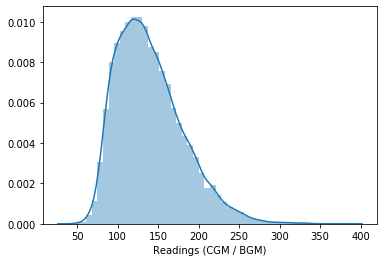

In [20]:
sns.distplot(df['Readings (CGM / BGM)'])

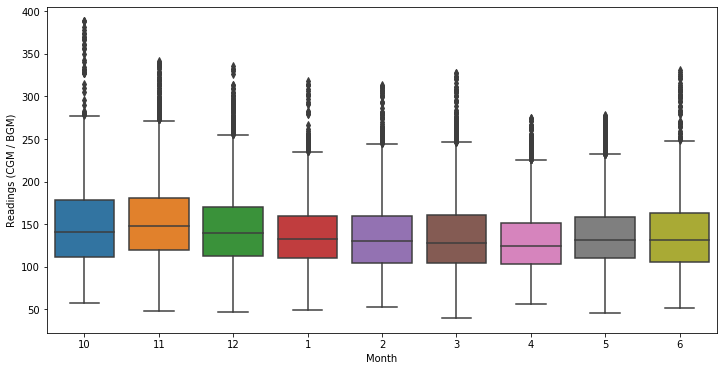

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month',y='Readings (CGM / BGM)',data=df,order=[10,11,12,1,2,3,4,5,6])

In [30]:
#df.iplot(x='Time',y='Readings (CGM / BGM)',kind='box', xTitle='Hour of the Day',
 #                 yTitle='Readings CGM/BGM', title='Glucose readings by Hour')

import plotly.express as px
fig = px.box(df, x="Time", y="Readings (CGM / BGM)")
fig.show()

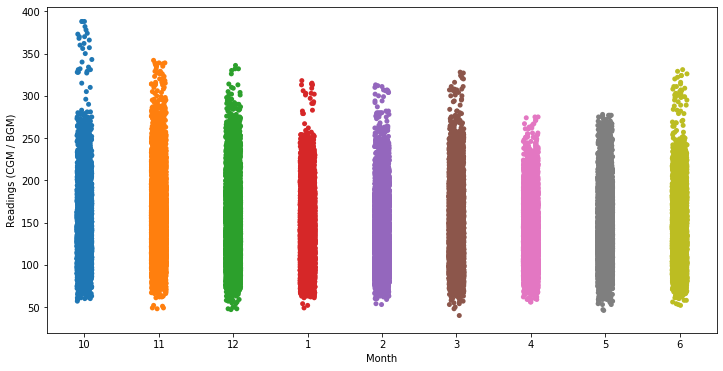

In [22]:
plt.figure(figsize=(12,6))
sns.stripplot(x='Month',y='Readings (CGM / BGM)',data=df,order=[10,11,12,1,2,3,4,5,6])

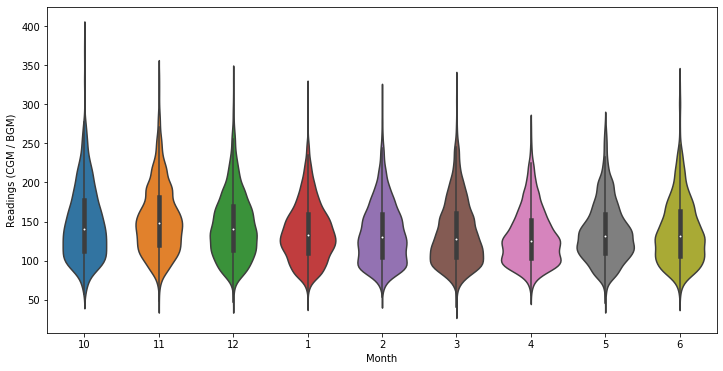

In [7]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Month',y='Readings (CGM / BGM)',data=df,order=[10,11,12,1,2,3,4,5,6])

In [8]:
df.loc[df['Readings (CGM / BGM)'] > 300 ].head(10)

Readings (CGM / BGM)        Date      Time  Year  Month  Day
1891                   301  2020-03-23  13:38:00  2020      3   23
1892                   308  2020-03-23  13:43:00  2020      3   23
1893                   311  2020-03-23  13:48:00  2020      3   23
1894                   320  2020-03-23  13:53:00  2020      3   23
1895                   327  2020-03-23  13:58:00  2020      3   23
1896                   328  2020-03-23  14:03:00  2020      3   23
1897                   324  2020-03-23  14:08:00  2020      3   23
1898                   323  2020-03-23  14:13:00  2020      3   23
1899                   321  2020-03-23  14:18:00  2020      3   23
1900                   316  2020-03-23  14:23:00  2020      3   23

(737325.0, 737600.6551747313)


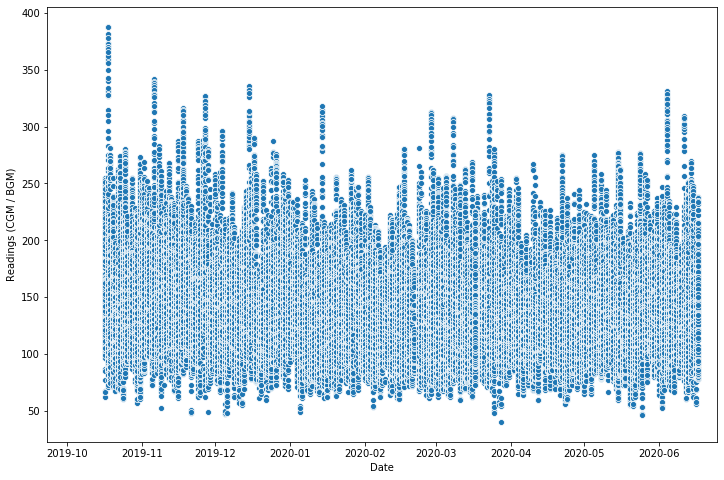

In [26]:
plt.figure(figsize=(12,8))
plt.xlim(737325,737600.6551747313)

sns.scatterplot(data=df,x='Date',y='Readings (CGM / BGM)')
print(plt.xlim())

In [27]:
df.iplot(x='Date',y='Readings (CGM / BGM)',kind='scatter', xTitle='Date',
                  yTitle='Readings CGM/BGM', title='Glucose readings by Date')

## This is going to be more EDA, but now it is for the tt_bolus data

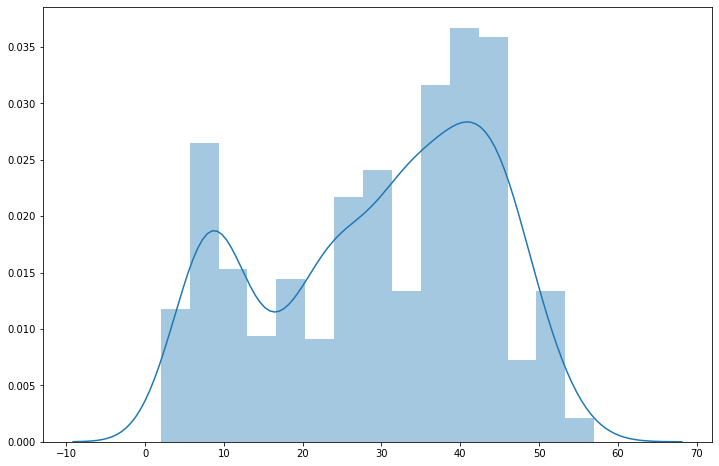

In [23]:
plt.figure(figsize=(12,8))

sns.distplot(bolus_df.loc[bolus_df['CarbSize'] !=0 , ['CarbSize']],bins=15)

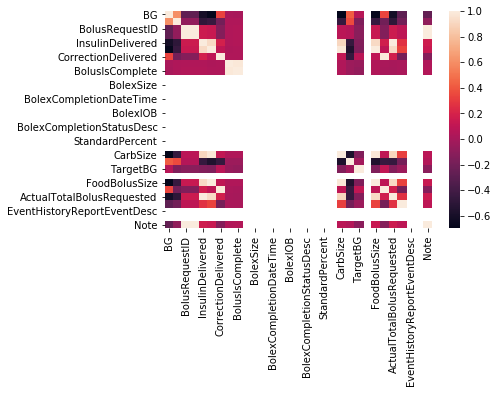

In [28]:
sns.heatmap(bolus_df.corr())

In [ ]:
#Questions
    #How does the bolus compare with the carb count
    #How accurate are the boluses being guessed, how often do corrections have to be made and is 
        #there any correlation with the carb size, time of day
    #What is the ratio of carbs to bolus and is this the right ratio? 
    
    #For the basils, do some basil values during some times correlate with higher BG levels
    #How is the basil sunspension system working